In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
DATA_DIR = "data/predictions/eval_results/"

assert(os.path.isdir(DATA_DIR) and "eval_results dir expected")

In [3]:
results = {}

for p_file in os.listdir(DATA_DIR):
    model_name = p_file.split("_")[3]
    results[model_name] = pd.read_csv(f"{DATA_DIR}/{p_file}")

In [4]:
print("Models evaluated:", results.keys())

Models evaluated: dict_keys(['gemma', 'gemmaqat', 'aya'])


metric_bert_score_P_cz [0.7225790178571428, 0.7205955357142857, 0.7210428571428571]
metric_bert_score_R_cz [0.7000303571428572, 0.7011334821428571, 0.6899834821428571]
metric_bert_score_F1_cz [0.7103013392857144, 0.7099174107142857, 0.7042799107142856]


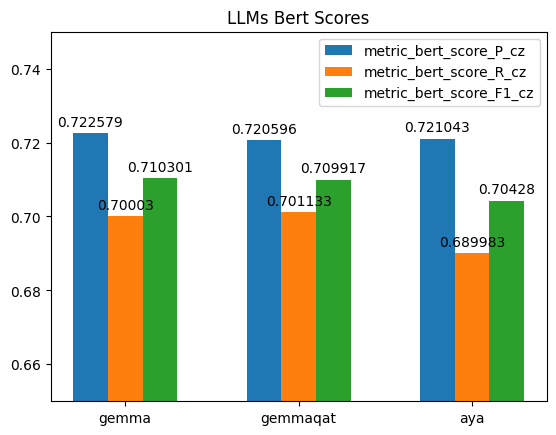

In [27]:
attributes = ["metric_bert_score_P_cz", "metric_bert_score_R_cz", "metric_bert_score_F1_cz"]
grouped_measurements = {attr: [results[model][attr].mean() for model in results.keys()] for attr in attributes}

x = np.arange(len(results))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for attr, measurements in grouped_measurements.items():
    offset = width * multiplier
    print(attr, measurements)
    rects = ax.bar(x + offset, measurements, width, label=attr)
    ax.bar_label(rects, padding=3)
    multiplier += 1
    
ax.set_title('LLMs Bert Scores')
ax.set_xticks(x + width, results.keys())

ax.set_ylim(0.65, 0.75)
plt.legend()
#plt.savefig("Bert_Scores_first.svg")
plt.show()